In [9]:
from sklearn.datasets import load_boston
import pandas as pd


In [10]:
boston = load_boston()
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = pd.DataFrame(boston.target, columns=["MDEV"])

基本的なデータ探索について記述せよ
以下の観点をすべて含めて記述しましょう。

このデータセットは何のデータセットであるか(何のために作成されたか、誰が作成したか、何年に作成されたか)
それぞれのカラムは何を表しているのか


In [11]:
X.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [12]:
y.head()

,MDEV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


基本的なデータ探索について記述せよ

以下の観点をすべて含めて記述しましょう。

このデータセットは何のデータセットであるか(何のために作成されたか、誰が作成したか、何年に作成されたか)
それぞれのカラムは何を表しているのか

このデータセットは、ボストンの住宅価格を各属性ごとに表示したデータセットであり、適切な住宅価格は、どういった属性情報を持ったものであるかを検討するために、Harrison, D.とRubinfeld, D.L.が1978年に作成したものである。属性情報として、それぞれのカラムが意味する所は以下の通り。


- CRIM：人口1人当たりの犯罪発生数
- ZN：25,000平方フィート以上の住宅区画の占める割合
- INDUS：小売業以外の商業が占める面積の割合
- CHAS：チャールズ川に関するダミー変数(1は川の周辺; 0はそれ以外)
- NOX：Nox(窒素)の濃度(parts per 10 million)
- RM：住居の平均部屋数
- AGE：1940年より前の立てられた物件の割合
- DIS：5つのボストン市の雇用施設からの距離
- RAD：環状高速道路へのアクセスのしやすさ
- TAX：$10,000当たりの不動産税率の総計
- PTRATIO：町毎の児童と教師の比率
- B：黒人の比率を1000(Bk - 0.63)^2で表したもの
- LSTAT：給料の低い職業に従事する人口の割合

In [13]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

describeメソッドを用いることで把握できたこと(考察)を記述せよ

以下の観点をすべて含めて記述しましょう。

前処理に関して気をつけるべき点
機械学習の手法選択に活かせること
機械学習の特徴選択について考えられること

- 前処理に関して、数値のみであるため、各カラムのスケールを統一すべきか否かを検討すべき。
- 機械学習の手法選択に生かせる事としては、目的変数であるMDEVが連続値であるため、回帰に適した手法を選択すべきだとわかる。
- 説明変数が13個あり、それぞれすべてを使用するか、一部を抜き出して使用するか、各説明変数の選択を被説明変数との関係性(例：相関)を考慮しながら、選択すべき。例えば、RMは明らかに住宅価格と密接に関連する説明変数であるため、特徴選択においては選択すべきであることが考えられる。

In [14]:
pd.DataFrame.corr(pd.concat([X,y],axis=1))

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MDEV
CRIM,1.000000,-0.199458,0.404471,-0.055295,0.417521,-0.219940,0.350784,-0.377904,0.622029,0.579564,0.288250,-0.377365,0.452220,-0.385832
ZN,-0.199458,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.404471,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055295,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.417521,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219940,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.350784,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.377904,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.622029,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.579564,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


二変数の可視化について記述せよ　相関

以下の観点をすべて含めて記述しましょう。

そもそも相関とは何か
MEDVにもっとも相関があると出力された変数を3つほどあげよ
相関がある変数を判明させることでどのように利用できそうか考察せよ（調査せよ）

- 相関とは、二つ以上の事物の、一方が変われば他方もそれに連れて変わるとか、あるものの影響を受けてかかわり合っているとかいうように、互いに関係を持つこと。また、そういう関係
- MDEVに最も相関があると出力された3つの変数はRM、PTRATIO、LSTAT
- 両者に何かしらの関係性があると考えられるため（場合によっては因果関係があることもあり）、例えば、部屋の数の増加と住宅価格の上昇を関連つけて捉えて、適切な住宅価格を導くために、部屋の数を決定することに利用できる

相関の注意点について記述せよ
便利な相関であるが、落とし穴がある

相関が正しく2変数の関係を表していない時がある、それはどのような場合か
その場合、どのような手段によって、確認するべきか

2変数が疑似相関である場合が挙げられる。AとBが一見すると相関があるように見えるものの、それが、3つ目のCによって引き起こされた場合である。このような第3者の変数が存在している場合には、相関が正しく2変数の関係を表していない状況となる。この場合、第３変数の影響を取り除いた（パーシャルアウトした）「偏相関係数」というものを求めることで確認できる。

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

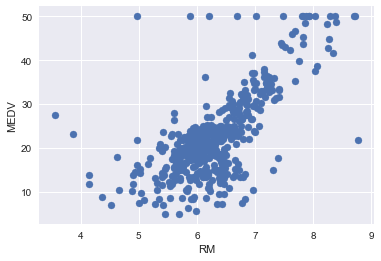

In [16]:
plt.scatter(X["RM"],y)
plt.xlabel("RM")
plt.ylabel("MEDV")

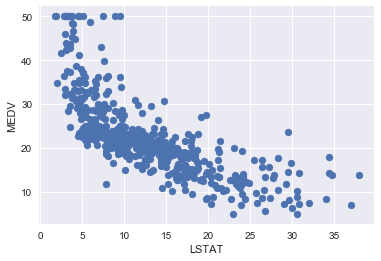

In [17]:
plt.scatter(X["LSTAT"],y)
plt.xlabel("LSTAT")
plt.ylabel("MEDV")

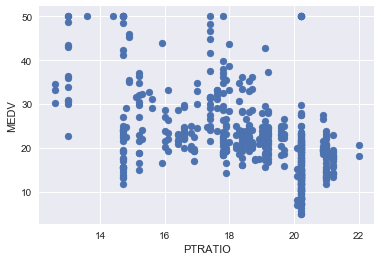

In [18]:
plt.scatter(X["PTRATIO"],y)
plt.xlabel("PTRATIO")
plt.ylabel("MEDV")

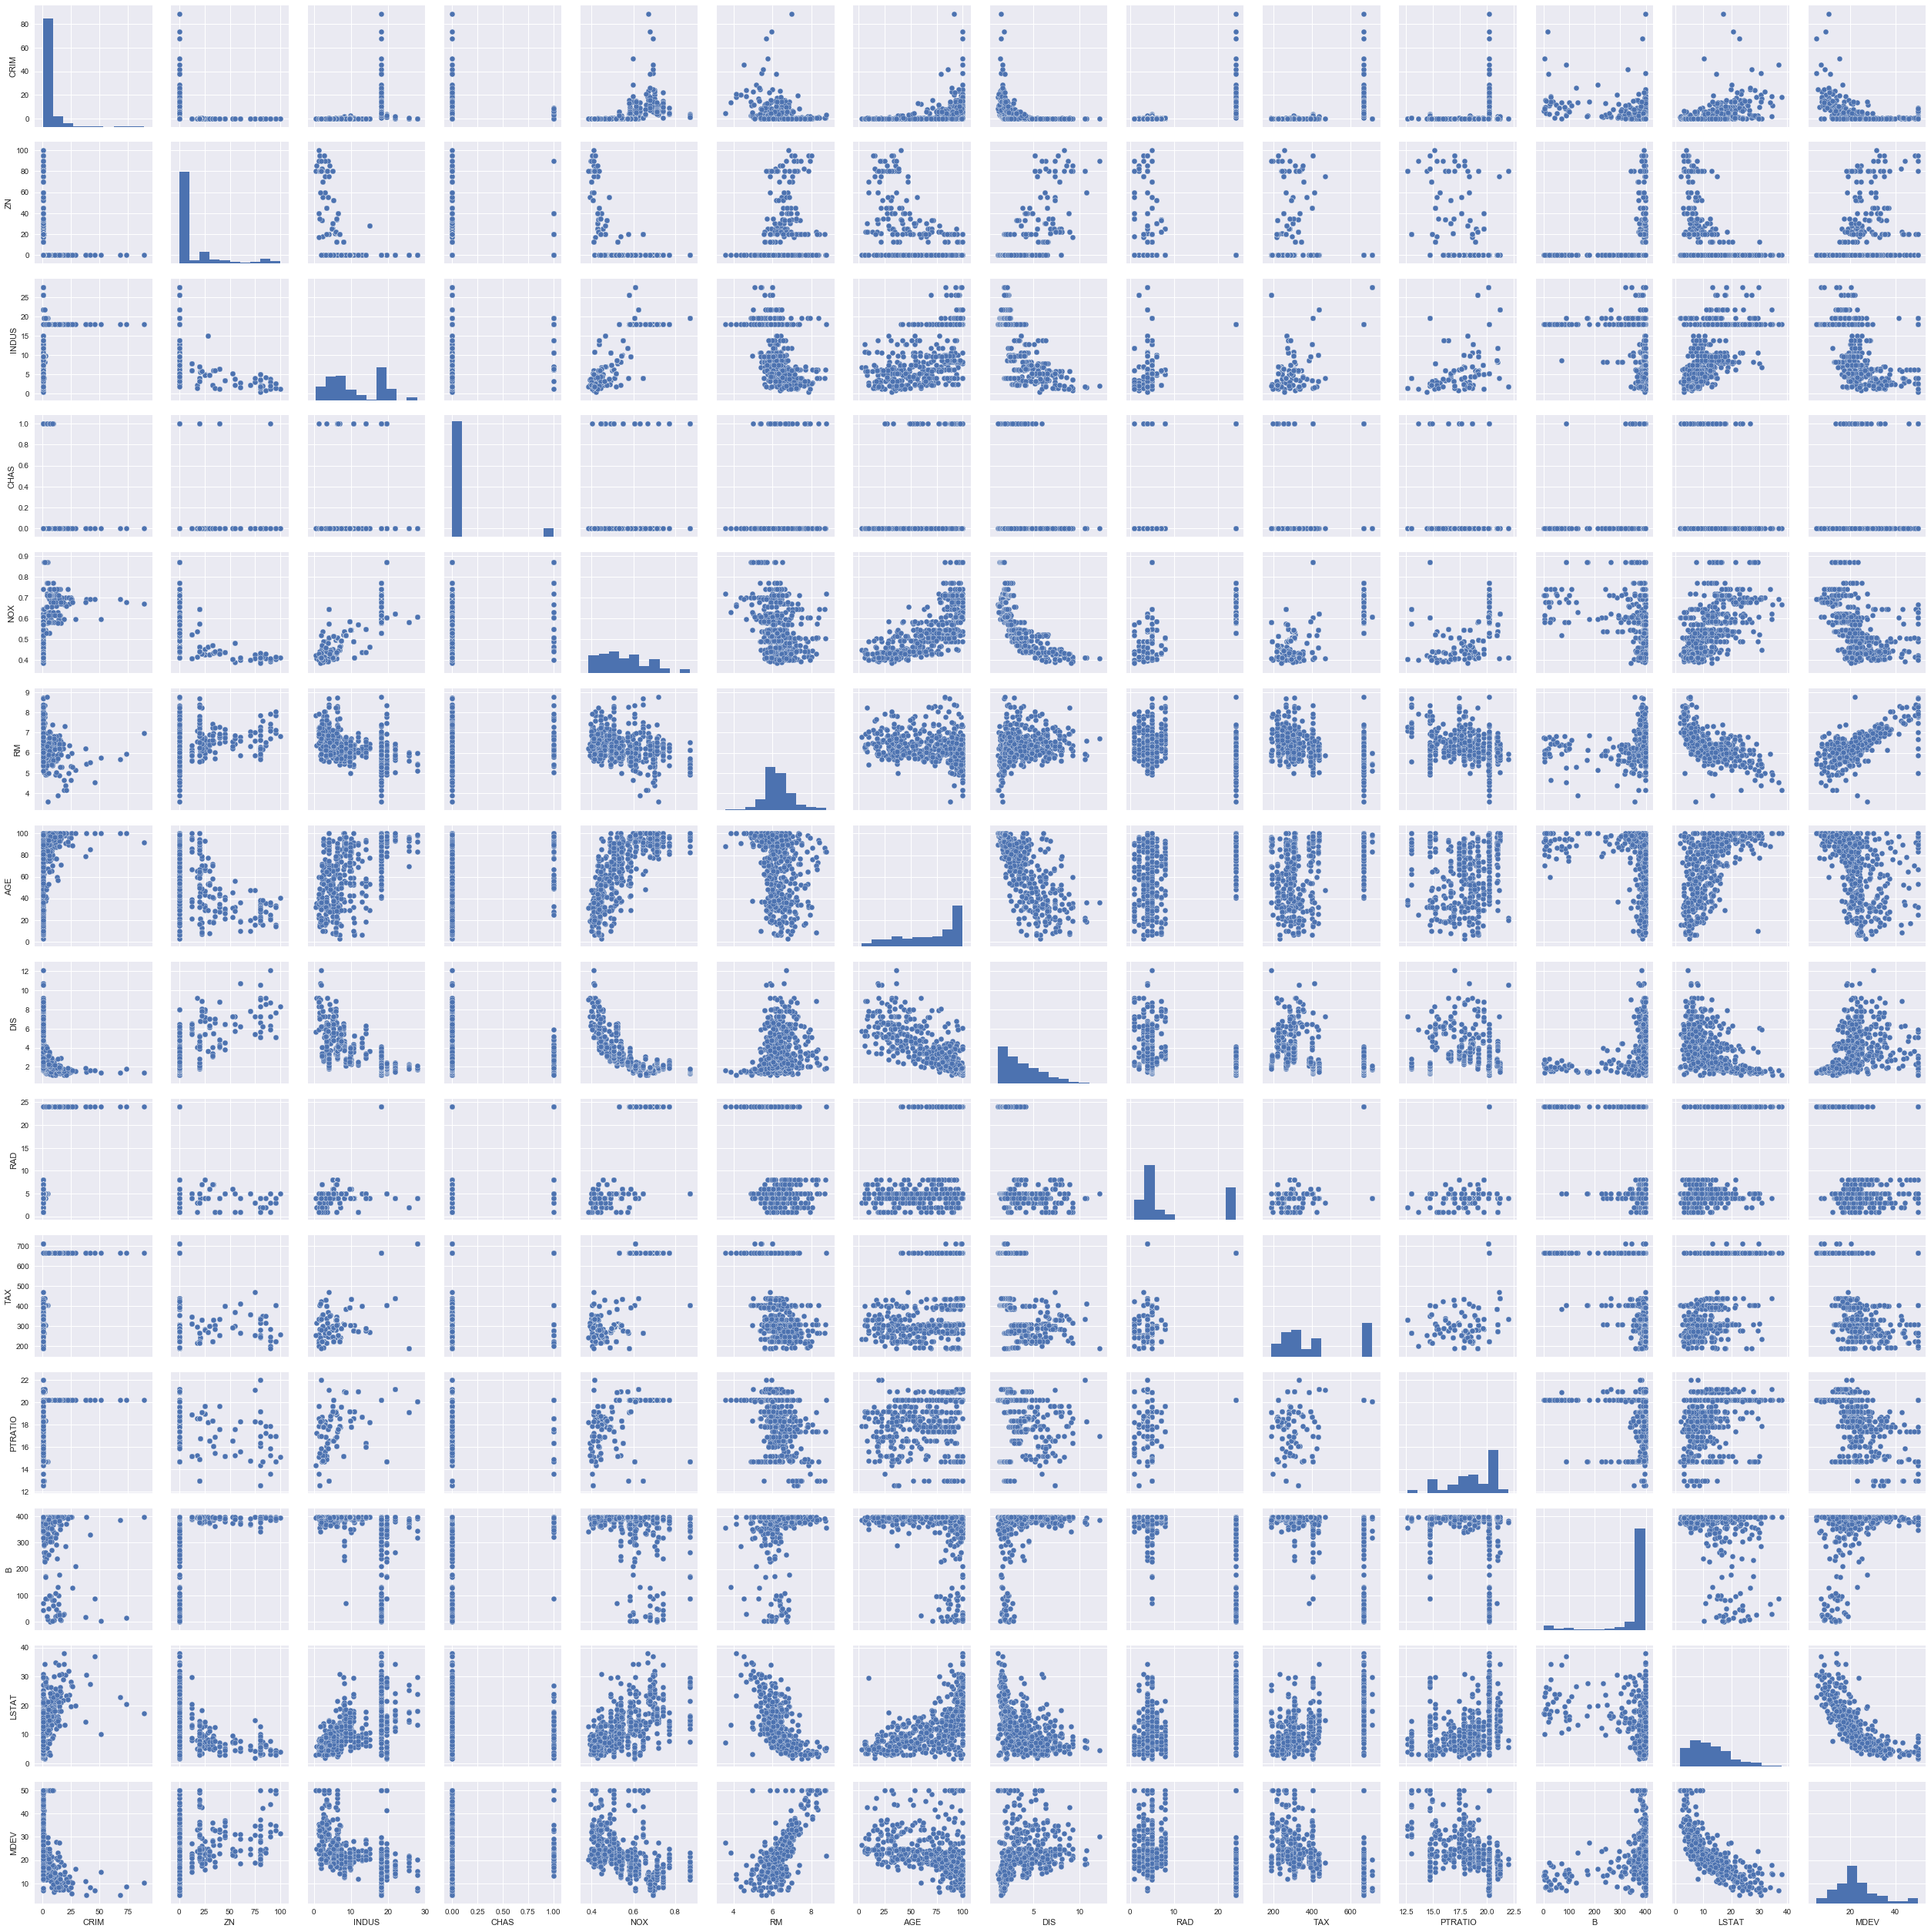

In [19]:
sns.pairplot(pd.concat([X,y],axis=1))

二変数の可視化について記述せよ　プロット

それぞれのプロット結果から、今回の相関はそれぞれ信用できるか記述せよ。

- RM：上側にばらつきがあり、また外れ値も散見されるため、相関係数がそれに引っ張られている傾向があるのではないかと思われる。一方でデータの大部分は正の相関が直線として成立している傾向もあるため、一定程度は信用できる
- LSTAT：信用できる。データの並びは負の関係にある
- PTRATIO：データに規則性があるとは言えないため、信用できない

In [20]:

from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=1, train_size=0.8)

In [22]:
from sklearn.tree import DecisionTreeRegressor

In [23]:
clf_1 = DecisionTreeRegressor(max_depth=1)
clf_1.fit(X_train, y_train)
clf_1.score(X_test, y_test)

0.4065506603539385

In [24]:
clf_2 = DecisionTreeRegressor(max_depth=2)
clf_2.fit(X_train, y_train)
clf_2.score(X_test, y_test)

0.74360667083305332

In [25]:
clf_3 = DecisionTreeRegressor(max_depth=3)
clf_3.fit(X_train, y_train)
clf_3.score(X_test, y_test)

0.81715036111411954

In [30]:
import numpy as np
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")

In [27]:
print(__doc__)
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.tree import DecisionTreeRegressor

Automatically created module for IPython interactive environment


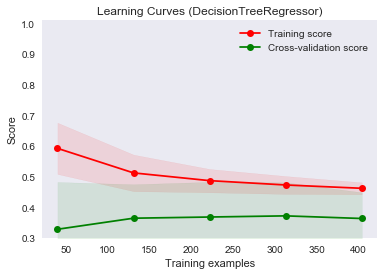

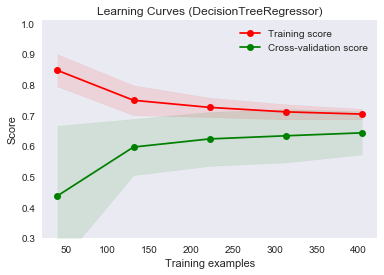

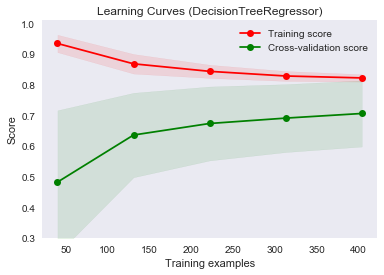

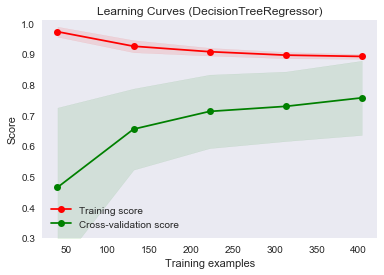

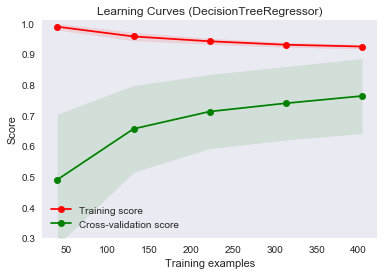

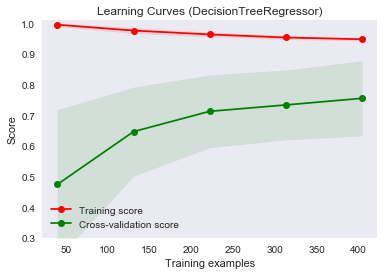

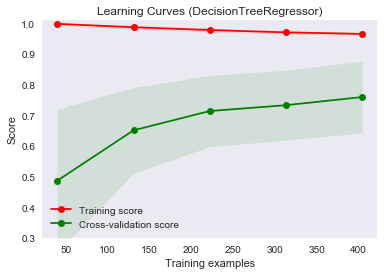

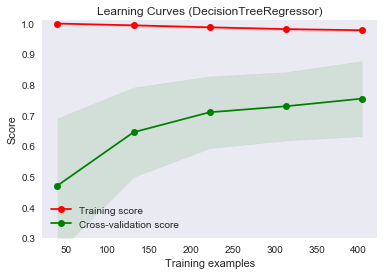

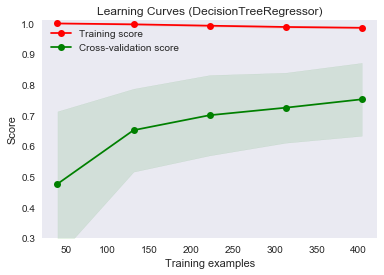

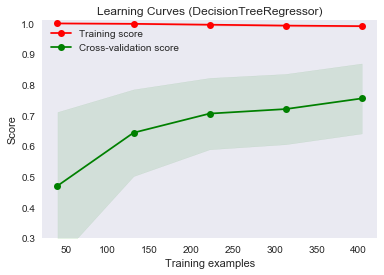

In [32]:
title = "Learning Curves (DecisionTreeRegressor)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

for degree in range(1,11):
    estimator = DecisionTreeRegressor(max_depth=degree)
    plot_learning_curve(estimator, title, X , y, ylim=(0.3, 1.01), cv=cv, n_jobs=4)

学習曲線について記述せよ

- High varianceとは何か
- High Biasとは何か
- もっとも結果が良いと思われた深さをひとつ選択せよ
- なぜその深さが最も良いか記述せよ
- その最も結果が良いと思われる深さにおいて、データ数を増やしていくと、さらに結果は良くなるか記述せよ

- High varianceとは、学習データに対する精度は良いものの、バリデーションデータについての精度は良くない状態。つまり過学習が生じている
- High Biasとは、学習データとバリデーションデータの精度にあまり差はないものの、そもそも精度が良くない状態。つまり、未学習となっている
- 最も結果が良いのは、degreeが５の時
- varianceとviasの関係性が一番望ましいため
- データの数を増やしていくと、これまでの学習曲線の傾向から考えると、学習データとバリデーションデータの広がりが少なくなっていくと想定されるため、さらに結果は良くなると考えられる。

In [72]:
from sklearn.metrics import r2_score, make_scorer
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

In [75]:
regressor = DecisionTreeRegressor()
param = {"max_depth":list(range(1,11))}
scoring_fnc = make_scorer(r2_score)
gs = GridSearchCV(regressor, param, scoring=scoring_fnc,cv=5)
gs.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=make_scorer(r2_score), verbose=0)

In [76]:
print(gs.best_params_)

{'max_depth': 6}


グリッドサーチについて記述せよ

グリッドサーチとは何か
グリッドサーチと同じようにハイパーパラメーターを探索する手法を挙げよ
その手法は、グリッドサーチと比べて、どの点で優れているか、どのように使い分けるべきか

グリッドサーチとは、ハイパーパラメータの探索空間を格子状 (グリッド) に区切り、交点となるハイパーパラメータの組み合わせについて、すべて調べるという方法。他の方法としてランダムサーチがあり、これは、すべてを調べるのではなく、ランダムに検索対象を選択して検索する方法である。一般的に、グリッドサーチは、すべての組み合わせを調べるため、処理時間がかかるという欠点があり、その欠点をカバーする手法としてランダムサーチが存在している。組み合わせが膨大になる際には、ランダムサーチを使い、それ以外はグリッドサーチを使うという使い分けを行う。

グリッドサーチを使いこなそう


グリッドサーチの際、Kfoldの折りたたみの回数を5回と設定しているが、それぞれ3回と10回に変えて検証せよ、また結果を元にどの折りたたみ回数がベストなのか考察せよ
グリッドサーチにおいて評価方法を決定係数を使用していたが、平均二乗誤差に変更せよ

以下で実施。なお、折り畳み関数はスタージェスの公式が使用できる。

In [78]:
regressor = DecisionTreeRegressor()
param = {"max_depth":list(range(1,11))}
scoring_fnc = make_scorer(r2_score)
gs = GridSearchCV(regressor, param, scoring=scoring_fnc,cv=3)
gs.fit(X_train, y_train)
print(gs.best_params_)

{'max_depth': 7}


In [79]:
regressor = DecisionTreeRegressor()
param = {"max_depth":list(range(1,11))}
scoring_fnc = make_scorer(r2_score)
gs = GridSearchCV(regressor, param, scoring=scoring_fnc,cv=10)
gs.fit(X_train, y_train)
print(gs.best_params_)

{'max_depth': 5}


In [89]:
from sklearn.metrics import mean_squared_error 
regressor = DecisionTreeRegressor()
param = {"max_depth":list(range(1,11))}
scoring_fnc = make_scorer(mean_squared_error )
gs = GridSearchCV(regressor, param, scoring=scoring_fnc,cv=10)
gs.fit(X_train, y_train)
print(gs.best_params_)


{'max_depth': 1}


In [94]:
regressor_best = DecisionTreeRegressor(max_depth=7)
regressor_best.fit(X_train, y_train)
regressor_best.score(X_test, y_test)

0.84312409657696163